In [1]:
import glob
import os
import sys
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib_venn import venn3, venn3_circles
from pylab import *
import seaborn as sns
sns.set()

pd.options.display.max_rows = 30

In [2]:
data_folder = './Accounts/q1_output/*.csv'

OUTPUT_COLS = ['id','date_published','link','caption_original','caption_cleaned','hashtags','num_comments',
               'num_shares','num_likes','Reactions_SUM','matched_keywords','language',
               'average_sentiment_score','sentiment','category',]

In [3]:
# create output directory
outputDir = os.path.dirname(data_folder).replace('q1_output', 'q7_output') + '/'
if not os.path.exists(outputDir):
    os.makedirs(outputDir)

In [4]:
pd.options.display.max_rows = 10
# read csv files and save targt columns to dataframe
filePaths = glob.glob(data_folder)  
data_df = pd.DataFrame(columns=OUTPUT_COLS)
for filename in filePaths:
    print(filename)    
    df_i = pd.read_csv(filename, encoding = 'utf-8')
    data_df = data_df.append(df_i, ignore_index=True)

./Accounts/q1_output/QuestionsdargentCanada_facebook_statuses.csv
./Accounts/q1_output/MPO_Centre_tweets.csv
./Accounts/q1_output/PechesOceansCanada_facebook_statuses.csv
./Accounts/q1_output/GCC_CCG_tweets.csv
./Accounts/q1_output/GCAutochtones_tweets.csv
./Accounts/q1_output/MPO_Science_tweets.csv
./Accounts/q1_output/ressourcenaturellescanada_posts.csv
./Accounts/q1_output/MPO_DFO_tweets.csv
./Accounts/q1_output/TransportsetInfrastructureauCanada_facebook_statuses.csv
./Accounts/q1_output/AAC_Canada_tweets.csv
./Accounts/q1_output/EnvironnementetressourcesnaturellesauCanada_facebook_statuses.csv
./Accounts/q1_output/GardeCotiereCanadienne_facebook_statuses.csv
./Accounts/q1_output/ministre_ec_tweets.csv
./Accounts/q1_output/MPO_GCC_Quebec_tweets.csv
./Accounts/q1_output/OfficeDesTransportsDuCanada_facebook_statuses.csv
./Accounts/q1_output/environnementcan_posts.csv
./Accounts/q1_output/MineGiant_tweets.csv
./Accounts/q1_output/MPO_TNL_tweets.csv
./Accounts/q1_output/parcs.canada_po

In [5]:
df = data_df[['id', 'date_published','caption_original','matched_keywords','category']]
df = df[~df['category'].str.contains('other')]

In [6]:
col_list = ['Economical', 'Environmental', 'Social']
for col in col_list:
    df[col] = 0
    df.loc[df.category.str.contains(col), col] = 1
df.to_csv(outputDir + 'q1_not_other_classes_fr.csv', index=None, encoding='utf-8')
df

,id,date_published,caption_original,matched_keywords,category,Economical,Environmental,Social
0,485734081568161_685291394945761,2016-02-23 11:45:32,ALERTE À LA FRAUDE: Prenez garde aux fraudeurs...,['revenu'],['Economical'],1,0,0
2,485734081568161_676778492463718,2016-02-02 11:46:01,"À compter de mars 2016, les entreprises canadi...",['changement'],['Social'],0,0,1
3,485734081568161_726632987478268,2016-05-16 17:45:30,Saviez-vous qu’il est possible de recevoir jus...,"['enfant', 'propre', 'enfant']","['Environmental', 'Social']",0,1,1
4,485734081568161_674594319348802,2016-01-28 11:46:07,Les frais de garde d’enfants grugent une bonne...,"['revenu', 'enfant']","['Economical', 'Social']",1,0,1
6,485734081568161_695050050636562,2016-03-16 13:45:16,Vous cherchez un emploi offrant des heures de ...,['emploi'],['Economical'],1,0,0
...,...,...,...,...,...,...,...,...
46667,870703813769830401,2017-06-02 18:09:00,Nous partons pour la Chine! Découvrez l’impact...,"['secteur', 'énergie', 'technologie', 'propre']","['Economical', 'Environmental']",1,1,0
46668,870717031196307456,2017-06-02 19:01:32,La recherche-développement à CanmetÉNERGIE con...,['propre'],['Environmental'],0,1,0
46671,870733046739337216,2017-06-02 20:05:10,L’éco-village #CanadaChine vu des airs #TechPr...,['air'],['Environmental'],0,1,0
46673,868089826289078274,2017-05-26 13:01:57,La CGC s’est servie du canot pour ses première...,['nord'],['Social'],0,0,1


# Plot Venn Diagram

In [7]:
econ = set(df[df['Economical'] == 1].id)
env = set(df[df['Environmental'] == 1].id)
soc = set(df[df['Social'] == 1].id)

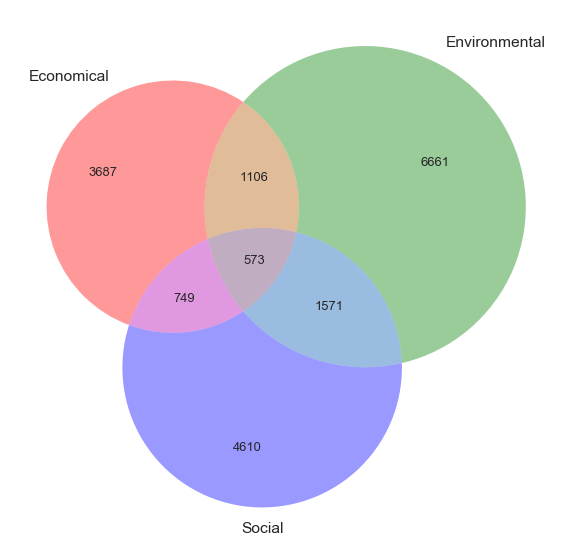

In [8]:
plt.clf()
plt.figure(figsize=(10,10))
rcParams['font.size'] = 13
venn3([econ, env, soc], ('Economical', 'Environmental', 'Social'))
plt.savefig(outputDir + 'q7_venn_diagram_fr.png')
plt.show()